Connected to base (Python 3.11.5)

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os
import random
from sklearn.cluster import KMeans


# 1. Initialize the model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Combine triples as a list
raw_dir = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/raw'

for split in ['train', 'valid', 'test']:
    with open(os.path.join(raw_dir, f'{split}.txt'), 'r') as f:
        # Read the file and split into lines, then split each line into components to form triples
        lines = f.read().split('\n')[:-1]
        triples = [row.split('\t') for row in lines]  # Each 'row' is split into head, relation, tail
        
        # Extract relations from triples
        relations = [triple[1] for triple in triples]

# # 3. Sample triples (subject, predicate, object)
# ==================Simple Triples=====================
# triples = [
#     ("Paris", "is the capital of", "France"),
#     ("The Eiffel Tower", "is located in", "Paris"),
#     ("Berlin", "is the capital of", "Germany")
# ]

# sample_triples = triples[:50]
# =====================================================

# =================Random Triples======================
# # The list has at least 50 triples randomly to avoid ValueError
# random.seed(42)

# if len(triples) >= 50:
#     sample_triples = random.sample(triples, 50)
# else:
#     print(f"Only {len(triples)} triples available, cannot select 50.")
#     sample_triples = triples  # Optionally, use all available triples if less than 50
# =====================================================


# 4. Convert triples into sentences
triple_sentences = [' '.join(triple) for triple in triples]

# 5. Convert triples and relations to embeddings
triple_embeddings = model.encode(triple_sentences) # (4053, 384)
relation_embeddings = model.encode(relations) # (4053, 384)

# 6. Sample question
questions = [
    "Who directed 'The Great Gatsby'?",
    "Which actor starred in the movie 'Inception'?",
    "What is the genre of 'Jurassic Park'?",
    "Which movies did Steven Spielberg direct?",
    "What year was 'Casablanca' released?",
    "Who played the lead role in 'Forrest Gump'?",
    "What are some action movies released in the 1990s?",
    "Which films feature Tom Hanks?",
    "Who wrote the screenplay for 'The Shawshank Redemption'?",
    "What movies are classified as horror released before 1980?",
    "Who composed the score for 'The Dark Knight'?",
    "In which movies has Scarlett Johansson appeared?",
    "Who directed 'Schindler's List' and in what year was it released?",
    "What are some of the best animations released in the 2000s?",
    "Which actor played Batman in 'The Dark Knight Rises'?",
    "Who starred in 'The Silence of the Lambs'?",
    "Name a few movies that are based on books.",
    "Who directed the 'Harry Potter' movies?",
    "List all movies released in 2001.",
    "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
    "What genre does 'Pulp Fiction' belong to?",
    "Who was the cinematographer for 'The Godfather'?",
    "Which actors starred in 'Gone with the Wind'?",
    "Who directed 'Alien' and what year was it released?",
    "Name all the movies where Morgan Freeman played the president.",
    "What was the first movie to win the Academy Award for Best Picture?",
    "Who are the main characters in 'Toy Story'?",
    "What is the plot of 'The Matrix'?",
    "Which movies have won more than three Oscars?",
    "What are some science fiction movies with a female lead?"
]

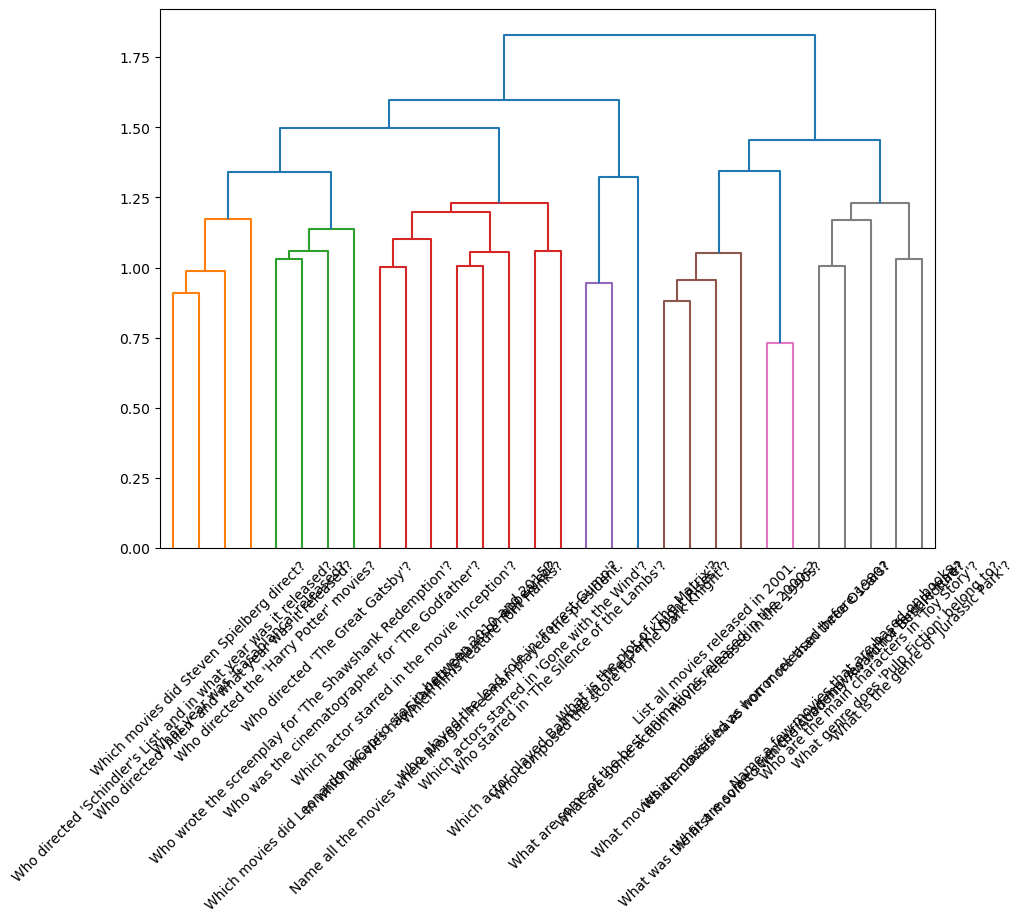

Cluster 1:
 - Who directed 'The Great Gatsby'?
 - Which actor starred in the movie 'Inception'?
 - What is the genre of 'Jurassic Park'?
 - Which movies did Steven Spielberg direct?
 - What year was 'Casablanca' released?
 - Who played the lead role in 'Forrest Gump'?
 - What are some action movies released in the 1990s?
 - Which films feature Tom Hanks?
 - Who wrote the screenplay for 'The Shawshank Redemption'?
 - What movies are classified as horror released before 1980?
 - Who composed the score for 'The Dark Knight'?
 - In which movies has Scarlett Johansson appeared?
 - Who directed 'Schindler's List' and in what year was it released?
 - What are some of the best animations released in the 2000s?
 - Which actor played Batman in 'The Dark Knight Rises'?
 - Who starred in 'The Silence of the Lambs'?
 - Name a few movies that are based on books.
 - Who directed the 'Harry Potter' movies?
 - List all movies released in 2001.
 - Which movies did Leonardo DiCaprio star in between 2010 

In [2]:
from sentence_transformers import SentenceTransformer
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Convert questions to embeddings
question_embeddings = model.encode(questions)

# Perform hierarchical clustering
linked = sch.linkage(question_embeddings, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
               orientation='top',
               labels=questions,
               distance_sort='descending',
               show_leaf_counts=True)
plt.show()

# To determine the number of clusters:
# From the dendrogram, decide on a 'distance' threshold that defines the number of clusters
# For example, let's say you choose a distance threshold of 10
distance_threshold = 10
clusters = sch.fcluster(linked, t=distance_threshold, criterion='distance')

# Analyze the clusters
cluster_dict = {}
for question, cluster_id in zip(questions, clusters):
    cluster_dict.setdefault(cluster_id, []).append(question)

# Print clusters and their contents
for cluster_id, questions in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    for question in questions:
        print(f" - {question}")


In [3]:
cluster_dict

{1: ["Who directed 'The Great Gatsby'?",
  "Which actor starred in the movie 'Inception'?",
  "What is the genre of 'Jurassic Park'?",
  'Which movies did Steven Spielberg direct?',
  "What year was 'Casablanca' released?",
  "Who played the lead role in 'Forrest Gump'?",
  'What are some action movies released in the 1990s?',
  'Which films feature Tom Hanks?',
  "Who wrote the screenplay for 'The Shawshank Redemption'?",
  'What movies are classified as horror released before 1980?',
  "Who composed the score for 'The Dark Knight'?",
  'In which movies has Scarlett Johansson appeared?',
  "Who directed 'Schindler's List' and in what year was it released?",
  'What are some of the best animations released in the 2000s?',
  "Which actor played Batman in 'The Dark Knight Rises'?",
  "Who starred in 'The Silence of the Lambs'?",
  'Name a few movies that are based on books.',
  "Who directed the 'Harry Potter' movies?",
  'List all movies released in 2001.',
  'Which movies did Leonardo 

In [4]:
question_embeddings.shape

(30, 384)

In [5]:
import os

# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = re.sub(r'\[.*?\]', '', question)
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)


IsADirectoryError: [Errno 21] Is a directory: '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA'

In [6]:
import os

# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = re.sub(r'\[.*?\]', '', question)
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)


NameError: name 're' is not defined

In [7]:
import os
import re


# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = re.sub(r'\[.*?\]', '', question)
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)


['what movies did  act in', 'what movies did  act in', 'what does  act in', 'what movies was  an actor in', 'what does  appear in', 'what movies was  an actor in', 'what does  appear in', 'what does  appear in', 'what films did  act in', 'what movies did  act in', 'what does  act in', 'what films did  act in', ' appears in which movies', 'what movies did  act in', 'what films does  appear in', 'what movies did  act in', 'what films did  star in', 'what movies did  act in', 'what movies did  act in', 'what does  star in', ' appears in which movies', 'what movies did  star in', 'what does  act in', 'what movies did  star in', 'what does  act in', 'what does  act in', 'what movies did  act in', ' appears in which movies', 'what films does  appear in', 'what movies was  an actor in', 'what does  appear in', 'what movies did  star in', 'what does  appear in', 'what movies did  act in', 'what movies did  act in', 'what movies did  star in', ' appears in which movies', 'what movies did  act i

In [8]:
import os
import re


# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = re.sub(r'\[]', '', question)
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)


['what movies did [Temuera Morrison] act in', 'what movies did [Evelyn Venable] act in', 'what does [Tom Cullen] act in', 'what movies was [Shareeka Epps] an actor in', 'what does [Peter Franzén] appear in', 'what movies was [Charles Martin Smith] an actor in', 'what does [Robert Stack] appear in', 'what does [Teresa Ann Savoy] appear in', 'what films did [Lily Tomlin] act in', 'what movies did [Tom Tryon] act in', 'what does [Laura Harring] act in', 'what films did [Patsha Bay] act in', '[Cristina Flutur] appears in which movies', 'what movies did [Karl Hardman] act in', 'what films does [Jessie Matthews] appear in', 'what movies did [Terrance Zdunich] act in', 'what films did [Cynthia Myers] star in', 'what movies did [Daniel Giménez Cacho] act in', 'what movies did [Javier Pereira] act in', 'what does [Adam Arkin] star in', '[Claire Skinner] appears in which movies', 'what movies did [Genevieve Tobin] star in', 'what does [Sabine Azéma] act in', 'what movies did [Walter Connolly] st

In [9]:
import os
import re


# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)


['what movies did Temuera Morrison act in', 'what movies did Evelyn Venable act in', 'what does Tom Cullen act in', 'what movies was Shareeka Epps an actor in', 'what does Peter Franzén appear in', 'what movies was Charles Martin Smith an actor in', 'what does Robert Stack appear in', 'what does Teresa Ann Savoy appear in', 'what films did Lily Tomlin act in', 'what movies did Tom Tryon act in', 'what does Laura Harring act in', 'what films did Patsha Bay act in', 'Cristina Flutur appears in which movies', 'what movies did Karl Hardman act in', 'what films does Jessie Matthews appear in', 'what movies did Terrance Zdunich act in', 'what films did Cynthia Myers star in', 'what movies did Daniel Giménez Cacho act in', 'what movies did Javier Pereira act in', 'what does Adam Arkin star in', 'Claire Skinner appears in which movies', 'what movies did Genevieve Tobin star in', 'what does Sabine Azéma act in', 'what movies did Walter Connolly star in', 'what does Christian Serratos act in', '

In [10]:
questions = [
    "Who directed 'The Great Gatsby'?",
    "Which actor starred in the movie 'Inception'?",
    "What is the genre of 'Jurassic Park'?",
    "Which movies did Steven Spielberg direct?",
    "What year was 'Casablanca' released?",
    "Who played the lead role in 'Forrest Gump'?",
    "What are some action movies released in the 1990s?",
    "Which films feature Tom Hanks?",
    "Who wrote the screenplay for 'The Shawshank Redemption'?",
    "What movies are classified as horror released before 1980?",
    "Who composed the score for 'The Dark Knight'?",
    "In which movies has Scarlett Johansson appeared?",
    "Who directed 'Schindler's List' and in what year was it released?",
    "What are some of the best animations released in the 2000s?",
    "Which actor played Batman in 'The Dark Knight Rises'?",
    "Who starred in 'The Silence of the Lambs'?",
    "Name a few movies that are based on books.",
    "Who directed the 'Harry Potter' movies?",
    "List all movies released in 2001.",
    "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
    "What genre does 'Pulp Fiction' belong to?",
    "Who was the cinematographer for 'The Godfather'?",
    "Which actors starred in 'Gone with the Wind'?",
    "Who directed 'Alien' and what year was it released?",
    "Name all the movies where Morgan Freeman played the president.",
    "What was the first movie to win the Academy Award for Best Picture?",
    "Who are the main characters in 'Toy Story'?",
    "What is the plot of 'The Matrix'?",
    "Which movies have won more than three Oscars?",
    "What are some science fiction movies with a female lead?"
]

In [11]:
questions

["Who directed 'The Great Gatsby'?",
 "Which actor starred in the movie 'Inception'?",
 "What is the genre of 'Jurassic Park'?",
 'Which movies did Steven Spielberg direct?',
 "What year was 'Casablanca' released?",
 "Who played the lead role in 'Forrest Gump'?",
 'What are some action movies released in the 1990s?',
 'Which films feature Tom Hanks?',
 "Who wrote the screenplay for 'The Shawshank Redemption'?",
 'What movies are classified as horror released before 1980?',
 "Who composed the score for 'The Dark Knight'?",
 'In which movies has Scarlett Johansson appeared?',
 "Who directed 'Schindler's List' and in what year was it released?",
 'What are some of the best animations released in the 2000s?',
 "Which actor played Batman in 'The Dark Knight Rises'?",
 "Who starred in 'The Silence of the Lambs'?",
 'Name a few movies that are based on books.',
 "Who directed the 'Harry Potter' movies?",
 'List all movies released in 2001.',
 'Which movies did Leonardo DiCaprio star in betwee

In [12]:
questions = [
    "Who directed 'The Great Gatsby'?",
    "Which actor starred in the movie 'Inception'?",
    "What is the genre of 'Jurassic Park'?",
    "Which movies did Steven Spielberg direct?",
    "What year was 'Casablanca' released?",
    "Who played the lead role in 'Forrest Gump'?",
    "What are some action movies released in the 1990s?",
    "Which films feature Tom Hanks?",
    "Who wrote the screenplay for 'The Shawshank Redemption'?",
    "What movies are classified as horror released before 1980?",
    "Who composed the score for 'The Dark Knight'?",
    "In which movies has Scarlett Johansson appeared?",
    "Who directed 'Schindler's List' and in what year was it released?",
    "What are some of the best animations released in the 2000s?",
    "Which actor played Batman in 'The Dark Knight Rises'?",
    "Who starred in 'The Silence of the Lambs'?",
    "Name a few movies that are based on books.",
    "Who directed the 'Harry Potter' movies?",
    "List all movies released in 2001.",
    "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
    "What genre does 'Pulp Fiction' belong to?",
    "Who was the cinematographer for 'The Godfather'?",
    "Which actors starred in 'Gone with the Wind'?",
    "Who directed 'Alien' and what year was it released?",
    "Name all the movies where Morgan Freeman played the president.",
    "What was the first movie to win the Academy Award for Best Picture?",
    "Who are the main characters in 'Toy Story'?",
    "What is the plot of 'The Matrix'?",
    "Which movies have won more than three Oscars?",
    "What are some science fiction movies with a female lead?"
]

In [13]:
import os
import re


# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)


['what movies did Temuera Morrison act in', 'what movies did Evelyn Venable act in', 'what does Tom Cullen act in', 'what movies was Shareeka Epps an actor in', 'what does Peter Franzén appear in', 'what movies was Charles Martin Smith an actor in', 'what does Robert Stack appear in', 'what does Teresa Ann Savoy appear in', 'what films did Lily Tomlin act in', 'what movies did Tom Tryon act in', 'what does Laura Harring act in', 'what films did Patsha Bay act in', 'Cristina Flutur appears in which movies', 'what movies did Karl Hardman act in', 'what films does Jessie Matthews appear in', 'what movies did Terrance Zdunich act in', 'what films did Cynthia Myers star in', 'what movies did Daniel Giménez Cacho act in', 'what movies did Javier Pereira act in', 'what does Adam Arkin star in', 'Claire Skinner appears in which movies', 'what movies did Genevieve Tobin star in', 'what does Sabine Azéma act in', 'what movies did Walter Connolly star in', 'what does Christian Serratos act in', '

In [14]:
questions[0]

'what movies did Temuera Morrison act in'

In [15]:
questions = [
    "Who directed 'The Great Gatsby'?",
    "Which actor starred in the movie 'Inception'?",
    "What is the genre of 'Jurassic Park'?",
    "Which movies did Steven Spielberg direct?",
    "What year was 'Casablanca' released?",
    "Who played the lead role in 'Forrest Gump'?",
    "What are some action movies released in the 1990s?",
    "Which films feature Tom Hanks?",
    "Who wrote the screenplay for 'The Shawshank Redemption'?",
    "What movies are classified as horror released before 1980?",
    "Who composed the score for 'The Dark Knight'?",
    "In which movies has Scarlett Johansson appeared?",
    "Who directed 'Schindler's List' and in what year was it released?",
    "What are some of the best animations released in the 2000s?",
    "Which actor played Batman in 'The Dark Knight Rises'?",
    "Who starred in 'The Silence of the Lambs'?",
    "Name a few movies that are based on books.",
    "Who directed the 'Harry Potter' movies?",
    "List all movies released in 2001.",
    "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
    "What genre does 'Pulp Fiction' belong to?",
    "Who was the cinematographer for 'The Godfather'?",
    "Which actors starred in 'Gone with the Wind'?",
    "Who directed 'Alien' and what year was it released?",
    "Name all the movies where Morgan Freeman played the president.",
    "What was the first movie to win the Academy Award for Best Picture?",
    "Who are the main characters in 'Toy Story'?",
    "What is the plot of 'The Matrix'?",
    "Which movies have won more than three Oscars?",
    "What are some science fiction movies with a female lead?"
]

In [16]:
questions[0]

"Who directed 'The Great Gatsby'?"

In [17]:
import os
import re


# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)


['what movies did Temuera Morrison act in', 'what movies did Evelyn Venable act in', 'what does Tom Cullen act in', 'what movies was Shareeka Epps an actor in', 'what does Peter Franzén appear in', 'what movies was Charles Martin Smith an actor in', 'what does Robert Stack appear in', 'what does Teresa Ann Savoy appear in', 'what films did Lily Tomlin act in', 'what movies did Tom Tryon act in', 'what does Laura Harring act in', 'what films did Patsha Bay act in', 'Cristina Flutur appears in which movies', 'what movies did Karl Hardman act in', 'what films does Jessie Matthews appear in', 'what movies did Terrance Zdunich act in', 'what films did Cynthia Myers star in', 'what movies did Daniel Giménez Cacho act in', 'what movies did Javier Pereira act in', 'what does Adam Arkin star in', 'Claire Skinner appears in which movies', 'what movies did Genevieve Tobin star in', 'what does Sabine Azéma act in', 'what movies did Walter Connolly star in', 'what does Christian Serratos act in', '

In [18]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os
import random
from sklearn.cluster import KMeans


# 1. Initialize the model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Combine triples as a list
raw_dir = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/raw'

for split in ['train', 'valid', 'test']:
    with open(os.path.join(raw_dir, f'{split}.txt'), 'r') as f:
        # Read the file and split into lines, then split each line into components to form triples
        lines = f.read().split('\n')[:-1]
        triples = [row.split('\t') for row in lines]  # Each 'row' is split into head, relation, tail
        
        # Extract relations from triples
        relations = [triple[1] for triple in triples]


# 4. Convert triples into sentences
triple_sentences = [' '.join(triple) for triple in triples]

# 5. Convert triples and relations to embeddings
triple_embeddings = model.encode(triple_sentences) # (4053, 384)
relation_embeddings = model.encode(relations) # (4053, 384)

# 6. Sample question
# questions = [
#     "Who directed 'The Great Gatsby'?",
#     "Which actor starred in the movie 'Inception'?",
#     "What is the genre of 'Jurassic Park'?",
#     "Which movies did Steven Spielberg direct?",
#     "What year was 'Casablanca' released?",
#     "Who played the lead role in 'Forrest Gump'?",
#     "What are some action movies released in the 1990s?",
#     "Which films feature Tom Hanks?",
#     "Who wrote the screenplay for 'The Shawshank Redemption'?",
#     "What movies are classified as horror released before 1980?",
#     "Who composed the score for 'The Dark Knight'?",
#     "In which movies has Scarlett Johansson appeared?",
#     "Who directed 'Schindler's List' and in what year was it released?",
#     "What are some of the best animations released in the 2000s?",
#     "Which actor played Batman in 'The Dark Knight Rises'?",
#     "Who starred in 'The Silence of the Lambs'?",
#     "Name a few movies that are based on books.",
#     "Who directed the 'Harry Potter' movies?",
#     "List all movies released in 2001.",
#     "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
#     "What genre does 'Pulp Fiction' belong to?",
#     "Who was the cinematographer for 'The Godfather'?",
#     "Which actors starred in 'Gone with the Wind'?",
#     "Who directed 'Alien' and what year was it released?",
#     "Name all the movies where Morgan Freeman played the president.",
#     "What was the first movie to win the Academy Award for Best Picture?",
#     "Who are the main characters in 'Toy Story'?",
#     "What is the plot of 'The Matrix'?",
#     "Which movies have won more than three Oscars?",
#     "What are some science fiction movies with a female lead?"
# ]
import os
import re

# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)

# Print or process the list of questions
print(questions)

['what movies did Temuera Morrison act in', 'what movies did Evelyn Venable act in', 'what does Tom Cullen act in', 'what movies was Shareeka Epps an actor in', 'what does Peter Franzén appear in', 'what movies was Charles Martin Smith an actor in', 'what does Robert Stack appear in', 'what does Teresa Ann Savoy appear in', 'what films did Lily Tomlin act in', 'what movies did Tom Tryon act in', 'what does Laura Harring act in', 'what films did Patsha Bay act in', 'Cristina Flutur appears in which movies', 'what movies did Karl Hardman act in', 'what films does Jessie Matthews appear in', 'what movies did Terrance Zdunich act in', 'what films did Cynthia Myers star in', 'what movies did Daniel Giménez Cacho act in', 'what movies did Javier Pereira act in', 'what does Adam Arkin star in', 'Claire Skinner appears in which movies', 'what movies did Genevieve Tobin star in', 'what does Sabine Azéma act in', 'what movies did Walter Connolly star in', 'what does Christian Serratos act in', '

In [19]:
results = []

for i, question in enumerate(questions):
    # Convert question to embeddings
    question_embedding = model.encode([question])

    # Calculate cosine similarities
    similarities = cosine_similarity(question_embedding, triple_embeddings)
    relation_similarities = cosine_similarity(question_embedding, relation_embeddings)

    # Find the index of the highest similarity score
    most_similar_index = np.argmax(similarities)
    most_similar_score = similarities[0, most_similar_index]
    
    # Find the most similar relation
    most_similar_relation_index = np.argmax(relation_similarities)
    most_similar_relation = relations[most_similar_index]
    
    # Find the cluster of the most similar relation
    question_topic_cluster = relation_to_cluster[most_similar_relation]
    
    # Append the results
    results.append({
        "Question": question,
        "Question Embedding": question_embedding,
        "Most Similar Triple": ' '.join(triples[most_similar_index]),
        "Answer": triples[most_similar_index][2],
        "Cosine Similarity Score": most_similar_score,
        "Most Similar Relation": most_similar_relation,
        "Topic Cluster": question_topic_cluster
    })

    # # Extract keywords for each question
    # tfidf_sorting = np.argsort(X[i].toarray()).flatten()[::-1]
    # n = 3  # Number of top keywords to extract
    # top_n = feature_array[tfidf_sorting][:n]
    # print(f"Question: {question}\nKeywords: {', '.join(top_n)}\n")


# Convert results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Set the threshold for high similarity
threshold = 0.7

# Add a new column 'High Similarity' to the DataFrame
# It will contain 1 if the cosine similarity score is above 0.8, and 0 otherwise
df_results['High Similarity'] = (df_results['Cosine Similarity Score'] >= threshold).astype(int)

NameError: name 'relation_to_cluster' is not defined

In [20]:
unique_relations_set = set(relations)

# # Convert the set back to a list if you need list operations later
# unique_relations_list = list(unique_relations_set)

# Print the unique relations
print("Unique relations:", unique_relations_set)
print("Number of unique relations:", len(unique_relations_set))

relation_kmeans = KMeans(n_clusters=9, random_state=42)
relation_fit = relation_kmeans.fit(relation_embeddings)
relation_clusters = relation_kmeans.fit_predict(relation_embeddings)

# Map each relation to its cluster
relation_to_cluster = {relation: cluster for relation, cluster in zip(relations, relation_clusters)}

Unique relations: {'directed_by', 'has_imdb_rating', 'has_imdb_votes', 'starred_actors', 'written_by', 'release_year', 'has_tags', 'has_genre', 'in_language'}
Number of unique relations: 9


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/yoninayoni/anaconda3/lib/python3.11/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os
import random
from sklearn.cluster import KMeans


# 1. Initialize the model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Combine triples as a list
raw_dir = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/raw'

for split in ['train', 'valid', 'test']:
    with open(os.path.join(raw_dir, f'{split}.txt'), 'r') as f:
        # Read the file and split into lines, then split each line into components to form triples
        lines = f.read().split('\n')[:-1]
        triples = [row.split('\t') for row in lines]  # Each 'row' is split into head, relation, tail
        
        # Extract relations from triples
        relations = [triple[1] for triple in triples]


# 4. Convert triples into sentences
triple_sentences = [' '.join(triple) for triple in triples]

# 5. Convert triples and relations to embeddings
triple_embeddings = model.encode(triple_sentences) # (4053, 384)
relation_embeddings = model.encode(relations) # (4053, 384)

# 6. Sample question
# questions = [
#     "Who directed 'The Great Gatsby'?",
#     "Which actor starred in the movie 'Inception'?",
#     "What is the genre of 'Jurassic Park'?",
#     "Which movies did Steven Spielberg direct?",
#     "What year was 'Casablanca' released?",
#     "Who played the lead role in 'Forrest Gump'?",
#     "What are some action movies released in the 1990s?",
#     "Which films feature Tom Hanks?",
#     "Who wrote the screenplay for 'The Shawshank Redemption'?",
#     "What movies are classified as horror released before 1980?",
#     "Who composed the score for 'The Dark Knight'?",
#     "In which movies has Scarlett Johansson appeared?",
#     "Who directed 'Schindler's List' and in what year was it released?",
#     "What are some of the best animations released in the 2000s?",
#     "Which actor played Batman in 'The Dark Knight Rises'?",
#     "Who starred in 'The Silence of the Lambs'?",
#     "Name a few movies that are based on books.",
#     "Who directed the 'Harry Potter' movies?",
#     "List all movies released in 2001.",
#     "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
#     "What genre does 'Pulp Fiction' belong to?",
#     "Who was the cinematographer for 'The Godfather'?",
#     "Which actors starred in 'Gone with the Wind'?",
#     "Who directed 'Alien' and what year was it released?",
#     "Name all the movies where Morgan Freeman played the president.",
#     "What was the first movie to win the Academy Award for Best Picture?",
#     "Who are the main characters in 'Toy Story'?",
#     "What is the plot of 'The Matrix'?",
#     "Which movies have won more than three Oscars?",
#     "What are some science fiction movies with a female lead?"
# ]
import os
import re

# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)

questions = question[:30]
# Print or process the list of questions
print(questions)

: 

In [22]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os
import random
from sklearn.cluster import KMeans


# 1. Initialize the model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Combine triples as a list
raw_dir = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/raw'

for split in ['train', 'valid', 'test']:
    with open(os.path.join(raw_dir, f'{split}.txt'), 'r') as f:
        # Read the file and split into lines, then split each line into components to form triples
        lines = f.read().split('\n')[:-1]
        triples = [row.split('\t') for row in lines]  # Each 'row' is split into head, relation, tail
        
        # Extract relations from triples
        relations = [triple[1] for triple in triples]


# 4. Convert triples into sentences
triple_sentences = [' '.join(triple) for triple in triples]

# 5. Convert triples and relations to embeddings
triple_embeddings = model.encode(triple_sentences) # (4053, 384)
relation_embeddings = model.encode(relations) # (4053, 384)

# 6. Sample question
# questions = [
#     "Who directed 'The Great Gatsby'?",
#     "Which actor starred in the movie 'Inception'?",
#     "What is the genre of 'Jurassic Park'?",
#     "Which movies did Steven Spielberg direct?",
#     "What year was 'Casablanca' released?",
#     "Who played the lead role in 'Forrest Gump'?",
#     "What are some action movies released in the 1990s?",
#     "Which films feature Tom Hanks?",
#     "Who wrote the screenplay for 'The Shawshank Redemption'?",
#     "What movies are classified as horror released before 1980?",
#     "Who composed the score for 'The Dark Knight'?",
#     "In which movies has Scarlett Johansson appeared?",
#     "Who directed 'Schindler's List' and in what year was it released?",
#     "What are some of the best animations released in the 2000s?",
#     "Which actor played Batman in 'The Dark Knight Rises'?",
#     "Who starred in 'The Silence of the Lambs'?",
#     "Name a few movies that are based on books.",
#     "Who directed the 'Harry Potter' movies?",
#     "List all movies released in 2001.",
#     "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
#     "What genre does 'Pulp Fiction' belong to?",
#     "Who was the cinematographer for 'The Godfather'?",
#     "Which actors starred in 'Gone with the Wind'?",
#     "Who directed 'Alien' and what year was it released?",
#     "Name all the movies where Morgan Freeman played the president.",
#     "What was the first movie to win the Academy Award for Best Picture?",
#     "Who are the main characters in 'Toy Story'?",
#     "What is the plot of 'The Matrix'?",
#     "Which movies have won more than three Oscars?",
#     "What are some science fiction movies with a female lead?"
# ]
import os
import re

# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)

questions = question[:30]
# Print or process the list of questions
print(questions)

what movies was [Ryan Rowe] th


In [23]:
questions

'what movies was [Ryan Rowe] th'

In [24]:
questions[0]

'w'

In [25]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os
import random
from sklearn.cluster import KMeans


# 1. Initialize the model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Combine triples as a list
raw_dir = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/raw'

for split in ['train', 'valid', 'test']:
    with open(os.path.join(raw_dir, f'{split}.txt'), 'r') as f:
        # Read the file and split into lines, then split each line into components to form triples
        lines = f.read().split('\n')[:-1]
        triples = [row.split('\t') for row in lines]  # Each 'row' is split into head, relation, tail
        
        # Extract relations from triples
        relations = [triple[1] for triple in triples]


# 4. Convert triples into sentences
triple_sentences = [' '.join(triple) for triple in triples]

# 5. Convert triples and relations to embeddings
triple_embeddings = model.encode(triple_sentences) # (4053, 384)
relation_embeddings = model.encode(relations) # (4053, 384)

# 6. Sample question
# questions = [
#     "Who directed 'The Great Gatsby'?",
#     "Which actor starred in the movie 'Inception'?",
#     "What is the genre of 'Jurassic Park'?",
#     "Which movies did Steven Spielberg direct?",
#     "What year was 'Casablanca' released?",
#     "Who played the lead role in 'Forrest Gump'?",
#     "What are some action movies released in the 1990s?",
#     "Which films feature Tom Hanks?",
#     "Who wrote the screenplay for 'The Shawshank Redemption'?",
#     "What movies are classified as horror released before 1980?",
#     "Who composed the score for 'The Dark Knight'?",
#     "In which movies has Scarlett Johansson appeared?",
#     "Who directed 'Schindler's List' and in what year was it released?",
#     "What are some of the best animations released in the 2000s?",
#     "Which actor played Batman in 'The Dark Knight Rises'?",
#     "Who starred in 'The Silence of the Lambs'?",
#     "Name a few movies that are based on books.",
#     "Who directed the 'Harry Potter' movies?",
#     "List all movies released in 2001.",
#     "Which movies did Leonardo DiCaprio star in between 2010 and 2015?",
#     "What genre does 'Pulp Fiction' belong to?",
#     "Who was the cinematographer for 'The Godfather'?",
#     "Which actors starred in 'Gone with the Wind'?",
#     "Who directed 'Alien' and what year was it released?",
#     "Name all the movies where Morgan Freeman played the president.",
#     "What was the first movie to win the Academy Award for Best Picture?",
#     "Who are the main characters in 'Toy Story'?",
#     "What is the plot of 'The Matrix'?",
#     "Which movies have won more than three Oscars?",
#     "What are some science fiction movies with a female lead?"
# ]
import os
import re

# Path to the text file
file_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)


# Print or process the list of questions
print(questions)

['what movies did Temuera Morrison act in', 'what movies did Evelyn Venable act in', 'what does Tom Cullen act in', 'what movies was Shareeka Epps an actor in', 'what does Peter Franzén appear in', 'what movies was Charles Martin Smith an actor in', 'what does Robert Stack appear in', 'what does Teresa Ann Savoy appear in', 'what films did Lily Tomlin act in', 'what movies did Tom Tryon act in', 'what does Laura Harring act in', 'what films did Patsha Bay act in', 'Cristina Flutur appears in which movies', 'what movies did Karl Hardman act in', 'what films does Jessie Matthews appear in', 'what movies did Terrance Zdunich act in', 'what films did Cynthia Myers star in', 'what movies did Daniel Giménez Cacho act in', 'what movies did Javier Pereira act in', 'what does Adam Arkin star in', 'Claire Skinner appears in which movies', 'what movies did Genevieve Tobin star in', 'what does Sabine Azéma act in', 'what movies did Walter Connolly star in', 'what does Christian Serratos act in', '

In [26]:
questions[0]

'what movies did Temuera Morrison act in'

In [27]:
questions[1]

'what movies did Evelyn Venable act in'

In [28]:
unique_relations_set = set(relations)

# # Convert the set back to a list if you need list operations later
# unique_relations_list = list(unique_relations_set)

# Print the unique relations
print("Unique relations:", unique_relations_set)
print("Number of unique relations:", len(unique_relations_set))

relation_kmeans = KMeans(n_clusters=9, random_state=42)
relation_fit = relation_kmeans.fit(relation_embeddings)
relation_clusters = relation_kmeans.fit_predict(relation_embeddings)

# Map each relation to its cluster
relation_to_cluster = {relation: cluster for relation, cluster in zip(relations, relation_clusters)}

Unique relations: {'directed_by', 'has_imdb_rating', 'has_imdb_votes', 'starred_actors', 'written_by', 'release_year', 'has_tags', 'has_genre', 'in_language'}
Number of unique relations: 9


In [29]:
results = []

for i, question in enumerate(questions):
    # Convert question to embeddings
    question_embedding = model.encode([question])

    # Calculate cosine similarities
    similarities = cosine_similarity(question_embedding, triple_embeddings)
    relation_similarities = cosine_similarity(question_embedding, relation_embeddings)

    # Find the index of the highest similarity score
    most_similar_index = np.argmax(similarities)
    most_similar_score = similarities[0, most_similar_index]
    
    # Find the most similar relation
    most_similar_relation_index = np.argmax(relation_similarities)
    most_similar_relation = relations[most_similar_index]
    
    # Find the cluster of the most similar relation
    question_topic_cluster = relation_to_cluster[most_similar_relation]
    
    # Append the results
    results.append({
        "Question": question,
        "Question Embedding": question_embedding,
        "Most Similar Triple": ' '.join(triples[most_similar_index]),
        "Answer": triples[most_similar_index][2],
        "Cosine Similarity Score": most_similar_score,
        "Most Similar Relation": most_similar_relation,
        "Topic Cluster": question_topic_cluster
    })

    # # Extract keywords for each question
    # tfidf_sorting = np.argsort(X[i].toarray()).flatten()[::-1]
    # n = 3  # Number of top keywords to extract
    # top_n = feature_array[tfidf_sorting][:n]
    # print(f"Question: {question}\nKeywords: {', '.join(top_n)}\n")


# Convert results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Set the threshold for high similarity
threshold = 0.7

# Add a new column 'High Similarity' to the DataFrame
# It will contain 1 if the cosine similarity score is above 0.8, and 0 otherwise
df_results['High Similarity'] = (df_results['Cosine Similarity Score'] >= threshold).astype(int)

In [32]:
df_results.head(5)

Question  \
0    what movies did Temuera Morrison act in   
1      what movies did Evelyn Venable act in   
2                what does Tom Cullen act in   
3  what movies was Shareeka Epps an actor in   
4          what does Peter Franzén appear in   

                                  Question Embedding  \
0  [[-0.006598208, -0.019544957, -0.067799225, 0....   
1  [[-0.010388991, -0.08291599, -0.054953225, -0....   
2  [[-0.13297552, 0.020367427, -0.044558767, -0.0...   
3  [[-0.06316256, 0.03435044, -0.07078423, -0.049...   
4  [[-0.015572246, -0.03157394, 0.0069728773, -0....   

                                 Most Similar Triple              Answer  \
0          The Comancheros starred_actors John Wayne          John Wayne   
1            The Prowler starred_actors Evelyn Keyes        Evelyn Keyes   
2      Man Trouble starred_actors Harry Dean Stanton  Harry Dean Stanton   
3  An Enemy of the People starred_actors Bibi And...      Bibi Andersson   
4        Peter's Friends directed_by Kenneth Branagh     Kenneth Branagh   

   Cosine Similarity Score Most Similar Relation  Topic Cluster  \
0                 0.458775        starred_actors              2   
1                 0.538746        starred_actors              2   
2                 0.443696        starred_actors              2   
3                 0.454099        starred_actors              2   
4                 0.481664           directed_by              5   

   High Similarity  
0                0  
1                0  
2                0  
3                0  
4                0

In [33]:
df_results.head(10)

Question  \
0           what movies did Temuera Morrison act in   
1             what movies did Evelyn Venable act in   
2                       what does Tom Cullen act in   
3         what movies was Shareeka Epps an actor in   
4                 what does Peter Franzén appear in   
5  what movies was Charles Martin Smith an actor in   
6                  what does Robert Stack appear in   
7              what does Teresa Ann Savoy appear in   
8                 what films did Lily Tomlin act in   
9                  what movies did Tom Tryon act in   

                                  Question Embedding  \
0  [[-0.006598208, -0.019544957, -0.067799225, 0....   
1  [[-0.010388991, -0.08291599, -0.054953225, -0....   
2  [[-0.13297552, 0.020367427, -0.044558767, -0.0...   
3  [[-0.06316256, 0.03435044, -0.07078423, -0.049...   
4  [[-0.015572246, -0.03157394, 0.0069728773, -0....   
5  [[-0.05754827, -0.0022269224, -0.044530917, 0....   
6  [[-0.05574759, -0.15049763, -0.08863673, -0.04...   
7  [[-0.03561688, -0.003468553, -0.018663399, 0.0...   
8  [[-0.057902817, -0.082955465, 0.039356533, -0....   
9  [[-0.114602156, -0.042370066, -0.053685293, -0...   

                                 Most Similar Triple              Answer  \
0          The Comancheros starred_actors John Wayne          John Wayne   
1            The Prowler starred_actors Evelyn Keyes        Evelyn Keyes   
2      Man Trouble starred_actors Harry Dean Stanton  Harry Dean Stanton   
3  An Enemy of the People starred_actors Bibi And...      Bibi Andersson   
4        Peter's Friends directed_by Kenneth Branagh     Kenneth Branagh   
5           Men in Black 3 starred_actors Will Smith          Will Smith   
6                The Ritz starred_actors Jack Weston         Jack Weston   
7                 Helen written_by Sandra Nettelbeck   Sandra Nettelbeck   
8                Pollyanna starred_actors Jane Wyman          Jane Wyman   
9           The Apparition starred_actors Tom Felton          Tom Felton   

   Cosine Similarity Score Most Similar Relation  Topic Cluster  \
0                 0.458775        starred_actors              2   
1                 0.538746        starred_actors              2   
2                 0.443696        starred_actors              2   
3                 0.454099        starred_actors              2   
4                 0.481664           directed_by              5   
5                 0.587437        starred_actors              2   
6                 0.446437        starred_actors              2   
7                 0.414685            written_by              0   
8                 0.479132        starred_actors              2   
9                 0.626381        starred_actors              2   

   High Similarity  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0

In [34]:
df_results.head(30)

Question  \
0            what movies did Temuera Morrison act in   
1              what movies did Evelyn Venable act in   
2                        what does Tom Cullen act in   
3          what movies was Shareeka Epps an actor in   
4                  what does Peter Franzén appear in   
5   what movies was Charles Martin Smith an actor in   
6                   what does Robert Stack appear in   
7               what does Teresa Ann Savoy appear in   
8                  what films did Lily Tomlin act in   
9                   what movies did Tom Tryon act in   
10                    what does Laura Harring act in   
11                  what films did Patsha Bay act in   
12           Cristina Flutur appears in which movies   
13               what movies did Karl Hardman act in   
14         what films does Jessie Matthews appear in   
15           what movies did Terrance Zdunich act in   
16              what films did Cynthia Myers star in   
17       what movies did Daniel Giménez Cacho act in   
18             what movies did Javier Pereira act in   
19                      what does Adam Arkin star in   
20            Claire Skinner appears in which movies   
21           what movies did Genevieve Tobin star in   
22                     what does Sabine Azéma act in   
23           what movies did Walter Connolly star in   
24               what does Christian Serratos act in   
25                      what does Stephen Rea act in   
26          what movies did Christopher Judge act in   
27          Curtis Armstrong appears in which movies   
28            what films does Matt LeBlanc appear in   
29          what movies was Laura Harris an actor in   

                                   Question Embedding  \
0   [[-0.006598208, -0.019544957, -0.067799225, 0....   
1   [[-0.010388991, -0.08291599, -0.054953225, -0....   
2   [[-0.13297552, 0.020367427, -0.044558767, -0.0...   
3   [[-0.06316256, 0.03435044, -0.07078423, -0.049...   
4   [[-0.015572246, -0.03157394, 0.0069728773, -0....   
5   [[-0.05754827, -0.0022269224, -0.044530917, 0....   
6   [[-0.05574759, -0.15049763, -0.08863673, -0.04...   
7   [[-0.03561688, -0.003468553, -0.018663399, 0.0...   
8   [[-0.057902817, -0.082955465, 0.039356533, -0....   
9   [[-0.114602156, -0.042370066, -0.053685293, -0...   
10  [[0.05252218, -0.05874334, -0.07242263, 0.0117...   
11  [[-0.019514397, -0.08628, 0.012521468, -0.0473...   
12  [[0.029828407, -0.09246772, -0.048311673, 0.01...   
13  [[-0.10073088, -0.089932196, -0.08190976, -0.0...   
14  [[-0.028489234, -0.13618952, 0.005250787, -0.0...   
15  [[-0.060658664, -0.0050214687, -0.034796495, -...   
16  [[-0.06960248, -0.035665434, -0.054281864, 0.0...   
17  [[-0.08340754, -0.021593697, -0.054512817, -0....   
18  [[-0.023786593, -0.090376355, -0.10480097, 0.0...   
19  [[-0.050796393, 0.0103024915, 0.040716726, -0....   
20  [[-0.10884052, -0.08722789, -0.04412975, -0.01...   
21  [[-0.022276893, -0.07287822, -0.010152381, -0....   
22  [[-0.02406578, 0.05784811, 0.0076872655, 0.010...   
23  [[0.051284935, -0.044909533, -0.11787717, -0.0...   
24  [[0.022105508, -0.042553768, -0.06793948, -0.0...   
25  [[-0.03647272, 0.059061307, -0.017477514, -0.0...   
26  [[-0.030034322, 0.021250188, -0.13127913, -0.0...   
27  [[-0.060866766, -0.022637367, -0.13242888, -0....   
28  [[-0.053801794, -0.0627455, -0.021142935, -0.1...   
29  [[-0.023161056, -0.11713285, -0.069848716, 0.0...   

                                  Most Similar Triple  \
0           The Comancheros starred_actors John Wayne   
1             The Prowler starred_actors Evelyn Keyes   
2       Man Trouble starred_actors Harry Dean Stanton   
3   An Enemy of the People starred_actors Bibi And...   
4         Peter's Friends directed_by Kenneth Branagh   
5            Men in Black 3 starred_actors Will Smith   
6                 The Ritz starred_actors Jack Weston   
7                  Helen written_by Sandra Nettelbeck   
8                 Pollyann

In [35]:
results = []

for i, question in enumerate(questions):
    # Convert question to embeddings
    question_embedding = model.encode([question])

    # Calculate cosine similarities
    similarities = cosine_similarity(question_embedding, triple_embeddings)
    relation_similarities = cosine_similarity(question_embedding, relation_embeddings)

    # # Find the index of the highest similarity score
    # most_similar_index = np.argmax(similarities)
    # most_similar_score = similarities[0, most_similar_index]
    
    # # Find the most similar relation
    # most_similar_relation_index = np.argmax(relation_similarities)
    # most_similar_relation = relations[most_similar_index]
    
    # # Find the cluster of the most similar relation
    # question_topic_cluster = relation_to_cluster[most_similar_relation]
    
    # Append the results
    results.append({
        "Question": question,
        # "Question Embedding": question_embedding,
        "Most Similar Triple": ' '.join(triples[most_similar_index]),
        # "Answer": triples[most_similar_index][2],
        "Cosine Similarity Score": most_similar_score,
        #"Most Similar Relation": most_similar_relation,
        #"Topic Cluster": question_topic_cluster
    })

# Convert results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Set the threshold for high similarity
threshold = 0.7

# Add a new column 'High Similarity' to the DataFrame
# It will contain 1 if the cosine similarity score is above 0.8, and 0 otherwise
df_results['High Similarity'] = (df_results['Cosine Similarity Score'] >= threshold).astype(int)

KeyboardInterrupt: 

In [36]:
results = []

for i, question in enumerate(questions):
    # Convert question to embeddings
    question_embedding = model.encode([question])

    # Calculate cosine similarities
    similarities = cosine_similarity(question_embedding, triple_embeddings)
    relation_similarities = cosine_similarity(question_embedding, relation_embeddings)

    # Find the index of the highest similarity score
    most_similar_index = np.argmax(similarities)
    most_similar_score = similarities[0, most_similar_index]
    
    # # Find the most similar relation
    # most_similar_relation_index = np.argmax(relation_similarities)
    # most_similar_relation = relations[most_similar_index]
    
    # # Find the cluster of the most similar relation
    # question_topic_cluster = relation_to_cluster[most_similar_relation]
    
    # Append the results
    results.append({
        "Question": question,
        # "Question Embedding": question_embedding,
        "Most Similar Triple": ' '.join(triples[most_similar_index]),
        # "Answer": triples[most_similar_index][2],
        "Cosine Similarity Score": most_similar_score,
        #"Most Similar Relation": most_similar_relation,
        #"Topic Cluster": question_topic_cluster
    })

# Convert results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Set the threshold for high similarity
threshold = 0.7

# Add a new column 'High Similarity' to the DataFrame
# It will contain 1 if the cosine similarity score is above 0.8, and 0 otherwise
df_results['High Similarity'] = (df_results['Cosine Similarity Score'] >= threshold).astype(int)

In [37]:
df_results.head(10)

Question  \
0           what movies did Temuera Morrison act in   
1             what movies did Evelyn Venable act in   
2                       what does Tom Cullen act in   
3         what movies was Shareeka Epps an actor in   
4                 what does Peter Franzén appear in   
5  what movies was Charles Martin Smith an actor in   
6                  what does Robert Stack appear in   
7              what does Teresa Ann Savoy appear in   
8                 what films did Lily Tomlin act in   
9                  what movies did Tom Tryon act in   

                                 Most Similar Triple  Cosine Similarity Score  \
0          The Comancheros starred_actors John Wayne                 0.458775   
1            The Prowler starred_actors Evelyn Keyes                 0.538746   
2      Man Trouble starred_actors Harry Dean Stanton                 0.443696   
3  An Enemy of the People starred_actors Bibi And...                 0.454099   
4        Peter's Friends directed_by Kenneth Branagh                 0.481664   
5           Men in Black 3 starred_actors Will Smith                 0.587437   
6                The Ritz starred_actors Jack Weston                 0.446437   
7                 Helen written_by Sandra Nettelbeck                 0.414685   
8                Pollyanna starred_actors Jane Wyman                 0.479132   
9           The Apparition starred_actors Tom Felton                 0.626381   

   High Similarity  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0

In [38]:
import os

# Path to the text file
file_path = '/Users/yoninayoni/Downloads/DistMult_RoBERTa_best_score_model.txt'

# Initialize a list to store the indices of lines ending with '1'
indices = []

# Open and read the file, keeping track of line numbers
with open(file_path, 'r') as file:
    for index, line in enumerate(file):
        # Strip whitespace for clean checking
        if line.strip().endswith('1'):
            # Append the index of the line (0-based index)
            indices.append(index)

# Print or process the indices of lines ending with '1'
print(indices)


[1335, 3917, 3919, 3920, 3925, 3927, 3930, 3936, 3937, 3938, 3939, 3940, 3943, 3945, 3948, 3951, 3954, 3956, 3961, 3964, 3965, 3966, 3969, 3970, 3971, 3973, 3974, 3975, 3976, 3979, 3981, 3982, 3983, 3988, 3989, 3991, 3992, 3993, 3996, 3997, 3998, 4000, 4003, 4005, 4006, 4010, 4015, 4016, 4018, 4022, 4025, 4028, 4031, 4032, 4034, 4035, 4042, 4043, 4045, 4049, 4050, 4054, 4055, 4056, 4058, 4059, 4065, 4067, 4068, 4069, 4070, 4076, 4084, 4085, 4087, 4095, 4100, 4101, 4105, 4107, 4109, 4112, 4114, 4117, 4119, 4121, 4123, 4124, 4127, 4129, 4130, 4131, 4132, 4137, 4139, 4140, 4142, 4145, 4151, 4152, 4153, 4154, 4157, 4158, 4161, 4164, 4166, 4169, 4171, 4176, 4180, 4181, 4182, 4183, 4184, 4186, 4187, 4188, 4189, 4195, 4197, 4201, 4208, 4210, 4211, 4215, 4216, 4223, 4224, 4229, 4232, 4233, 4235, 4237, 4241, 4243, 4244, 4248, 4249, 4257, 4258, 4259, 4264, 4265, 4266, 4267, 4270, 4275, 4276, 4278, 4280, 4282, 4284, 4286, 4287, 4289, 4290, 4291, 4293, 4296, 4300, 4302, 4305, 4310, 4317, 4320, 432

In [39]:
import pandas as pd

# Path to the text file
file_path = '/Users/yoninayoni/Downloads/DistMult_RoBERTa_best_score_model.txt'

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep='\t', header=None, names=['Question', 'ID', 'Flag'])

# Display the first few rows of the DataFrame to verify its structure
print(df.head())

                         Question     ID  Flag
0       what movies did NE act in  36059     0
1       what movies did NE act in  36059     0
2             what does NE act in  36059     0
3  what movies was NE an actor in  34494     0
4          what does NE appear in   9275     0


In [40]:
df.head()

Question     ID  Flag
0       what movies did NE act in  36059     0
1       what movies did NE act in  36059     0
2             what does NE act in  36059     0
3  what movies was NE an actor in  34494     0
4          what does NE appear in   9275     0

In [41]:
import pandas as pd

# Assuming df and df_results are already loaded and look like the descriptions you've given.

# Counting '1's in the Flag column of df
flag_count = df['Flag'].sum()

# Counting '1's in the High Similarity column of df_results
high_similarity_count = df_results['High Similarity'].sum()

# Printing the counts
print("Number of '1's in df (Flag):", flag_count)
print("Number of '1's in df_results (High Similarity):", high_similarity_count)

# Determining which has more '1's
if flag_count > high_similarity_count:
    print("df has more '1's in the Flag column.")
elif flag_count < high_similarity_count:
    print("df_results has more '1's in the High Similarity column.")
else:
    print("Both columns have the same number of '1's.")


Number of '1's in df (Flag): 417
Number of '1's in df_results (High Similarity): 573
df_results has more '1's in the High Similarity column.


In [42]:
import pandas as pd

# Assuming df and df_results are already loaded and look like the descriptions you've given.

# Counting '1's in the Flag column of df
flag_count = df['Flag'].sum()

# Counting '1's in the High Similarity column of df_results
high_similarity_count = df_results['High Similarity'].sum()

# Printing the counts
print("Number of '1's in Modeling:", flag_count)
print("Number of '1's in Classical Method:", high_similarity_count)

# Determining which has more '1's
if flag_count > high_similarity_count:
    print("Modeling has more '1's.")
elif flag_count < high_similarity_count:
    print("Cosine Similarity has more '1's.")
else:
    print("Both columns have the same number of '1's.")


Number of '1's in Modeling: 417
Number of '1's in Classical Method: 573
Cosine Similarity has more '1's.


In [43]:
questions

['what movies did Temuera Morrison act in',
 'what movies did Evelyn Venable act in',
 'what does Tom Cullen act in',
 'what movies was Shareeka Epps an actor in',
 'what does Peter Franzén appear in',
 'what movies was Charles Martin Smith an actor in',
 'what does Robert Stack appear in',
 'what does Teresa Ann Savoy appear in',
 'what films did Lily Tomlin act in',
 'what movies did Tom Tryon act in',
 'what does Laura Harring act in',
 'what films did Patsha Bay act in',
 'Cristina Flutur appears in which movies',
 'what movies did Karl Hardman act in',
 'what films does Jessie Matthews appear in',
 'what movies did Terrance Zdunich act in',
 'what films did Cynthia Myers star in',
 'what movies did Daniel Giménez Cacho act in',
 'what movies did Javier Pereira act in',
 'what does Adam Arkin star in',
 'Claire Skinner appears in which movies',
 'what movies did Genevieve Tobin star in',
 'what does Sabine Azéma act in',
 'what movies did Walter Connolly star in',
 'what does Chris

In [44]:
df_results.tail()

Question  \
9987                  which movie did Bob Brunner write   
9988  which film did Mark Rosenthal write the story for   
9989       what films was Andrew Deutschman a writer on   
9990          what movies was Mark Bowden the writer of   
9991            what movies was Ryan Rowe the writer of   

                                    Most Similar Triple  \
9987     The Producers starred_actors Matthew Broderick   
9988  The Story of Esther Costello directed_by David...   
9989          The Cameraman directed_by Edward Sedgwick   
9990                     Bowfinger directed_by Frank Oz   
9991   The Wind and the Lion starred_actors Brian Keith   

      Cosine Similarity Score  High Similarity  
9987                 0.513636                0  
9988                 0.442555                0  
9989                 0.479301                0  
9990                 0.550002                0  
9991                 0.478759                0

In [45]:
df_results['High Similarity'] > 0

0       False
1       False
2       False
3       False
4       False
        ...  
9987    False
9988    False
9989    False
9990    False
9991    False
Name: High Similarity, Length: 9992, dtype: bool

In [46]:
df_results['High Similarity'] > 0 == 'True'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:
# Path to the text file
modeling_question_path = '/Users/yoninayoni/Downloads/DistMult_RoBERTa_best_score_model.txt'

# Read the file into a DataFrame
df = pd.read_csv(modeling_question_path, sep='\t', header=None, names=['Question', 'ID', 'Flag'])

# Display the first few rows of the DataFrame to verify its structure
print(df.head())


# Counting '1's in the Flag column of df
modeling_count = df['Flag'].sum()

# Counting '1's in the High Similarity column of df_results
high_similarity_count = df_results['High Similarity'].sum()

# Printing the counts
print("Number of '1's in Modeling:", modeling_count)
print("Number of '1's in Classical Method:", high_similarity_count)

# Determining which has more '1's
if modeling_count > high_similarity_count:
    print("Modeling has more '1's.")
elif modeling_count < high_similarity_count:
    print("Cosine Similarity has more '1's.")
else:
    print("Both columns have the same number of '1's.")

                         Question     ID  Flag
0       what movies did NE act in  36059     0
1       what movies did NE act in  36059     0
2             what does NE act in  36059     0
3  what movies was NE an actor in  34494     0
4          what does NE appear in   9275     0
Number of '1's in Modeling: 417
Number of '1's in Classical Method: 573
Cosine Similarity has more '1's.


In [48]:
unique_relations_set = set(relations)

# # Convert the set back to a list if you need list operations later
# unique_relations_list = list(unique_relations_set)

# Print the unique relations
print("Unique relations:", unique_relations_set)
print("Number of unique relations:", len(unique_relations_set))

relation_kmeans = KMeans(n_clusters=9, random_state=42)
relation_fit = relation_kmeans.fit(relation_embeddings)
relation_clusters = relation_kmeans.fit_predict(relation_embeddings)

# Map each relation to its cluster
relation_to_cluster = {relation: cluster for relation, cluster in zip(relations, relation_clusters)}

Unique relations: {'directed_by', 'has_imdb_rating', 'has_imdb_votes', 'starred_actors', 'written_by', 'release_year', 'has_tags', 'has_genre', 'in_language'}
Number of unique relations: 9


In [49]:
results = []

for i, question in enumerate(questions):
    # Convert question to embeddings
    question_embedding = model.encode([question])

    # Calculate cosine similarities
    similarities = cosine_similarity(question_embedding, triple_embeddings)
    relation_similarities = cosine_similarity(question_embedding, relation_embeddings)

    # Find the index of the highest similarity score
    most_similar_index = np.argmax(similarities)
    most_similar_score = similarities[0, most_similar_index]
    
    # Find the most similar relation
    most_similar_relation_index = np.argmax(relation_similarities)
    most_similar_relation = relations[most_similar_index]
    
    # Find the cluster of the most similar relation
    question_topic_cluster = relation_to_cluster[most_similar_relation]
    
    # Append the results
    results.append({
        "Question": question,
        # "Question Embedding": question_embedding,
        "Most Similar Triple": ' '.join(triples[most_similar_index]),
        # "Answer": triples[most_similar_index][2],
        "Cosine Similarity Score": most_similar_score,
        "Most Similar Relation": most_similar_relation,
        "Topic Cluster": question_topic_cluster
    })

# Convert results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Set the threshold for high similarity
threshold = 0.7

# Add a new column 'High Similarity' to the DataFrame
# It will contain 1 if the cosine similarity score is above 0.8, and 0 otherwise
df_results['High Similarity'] = (df_results['Cosine Similarity Score'] >= threshold).astype(int)

In [50]:
df_results.head()

Question  \
0    what movies did Temuera Morrison act in   
1      what movies did Evelyn Venable act in   
2                what does Tom Cullen act in   
3  what movies was Shareeka Epps an actor in   
4          what does Peter Franzén appear in   

                                 Most Similar Triple  Cosine Similarity Score  \
0          The Comancheros starred_actors John Wayne                 0.458775   
1            The Prowler starred_actors Evelyn Keyes                 0.538746   
2      Man Trouble starred_actors Harry Dean Stanton                 0.443696   
3  An Enemy of the People starred_actors Bibi And...                 0.454099   
4        Peter's Friends directed_by Kenneth Branagh                 0.481664   

  Most Similar Relation  Topic Cluster  High Similarity  
0        starred_actors              2                0  
1        starred_actors              2                0  
2        starred_actors              2                0  
3        starred_actors              2                0  
4           directed_by              5                0

In [51]:
df_results['Topic Cluster'].nunique()

9

Connected to base (Python 3.11.5)

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os
import random
from sklearn.cluster import KMeans
import re


# 1. Initialize the model for embedding
model = SentenceTransformer('all-MiniLM-L6-v2')

# 2. Combine triples as a list
raw_dir = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/raw'

for split in ['train', 'valid', 'test']:
    with open(os.path.join(raw_dir, f'{split}.txt'), 'r') as f:
        # Read the file and split into lines, then split each line into components to form triples
        lines = f.read().split('\n')[:-1]
        triples = [row.split('\t') for row in lines]  # Each 'row' is split into head, relation, tail
        
        # Extract relations from triples
        relations = [triple[1] for triple in triples]


# 4. Convert triples into sentences
triple_sentences = [' '.join(triple) for triple in triples]

# 5. Convert triples and relations to embeddings
triple_embeddings = model.encode(triple_sentences) # (4053, 384)
relation_embeddings = model.encode(relations) # (4053, 384)

In [2]:
# 6. Sample question

# Path to the text file
question_path = '/Users/yoninayoni/Documents/GitHub/Capstone/data/MetaQA/qa_dev_1hop.txt'

# Initialize an empty list to store the questions
questions = []

# Open and read the file
with open(question_path, 'r') as file:
    for line in file:
        # Split the line at the tab character
        parts = line.strip().split('\t')
        if len(parts) > 1:
            question = parts[0]
            # Remove the brackets and anything inside them
            cleaned_question = question.replace('[', '').replace(']', '')
            # Append the cleaned question to the list
            questions.append(cleaned_question)


# Print or process the list of questions
print(questions)

['what movies did Temuera Morrison act in', 'what movies did Evelyn Venable act in', 'what does Tom Cullen act in', 'what movies was Shareeka Epps an actor in', 'what does Peter Franzén appear in', 'what movies was Charles Martin Smith an actor in', 'what does Robert Stack appear in', 'what does Teresa Ann Savoy appear in', 'what films did Lily Tomlin act in', 'what movies did Tom Tryon act in', 'what does Laura Harring act in', 'what films did Patsha Bay act in', 'Cristina Flutur appears in which movies', 'what movies did Karl Hardman act in', 'what films does Jessie Matthews appear in', 'what movies did Terrance Zdunich act in', 'what films did Cynthia Myers star in', 'what movies did Daniel Giménez Cacho act in', 'what movies did Javier Pereira act in', 'what does Adam Arkin star in', 'Claire Skinner appears in which movies', 'what movies did Genevieve Tobin star in', 'what does Sabine Azéma act in', 'what movies did Walter Connolly star in', 'what does Christian Serratos act in', '

In [3]:
unique_relations_set = set(relations)

# # Convert the set back to a list if you need list operations later
# unique_relations_list = list(unique_relations_set)

# Print the unique relations
print("Unique relations:", unique_relations_set)
print("Number of unique relations:", len(unique_relations_set))

relation_kmeans = KMeans(n_clusters=9, random_state=42)
relation_fit = relation_kmeans.fit(relation_embeddings)
relation_clusters = relation_kmeans.fit_predict(relation_embeddings)

# Map each relation to its cluster
relation_to_cluster = {relation: cluster for relation, cluster in zip(relations, relation_clusters)}

Unique relations: {'has_tags', 'has_imdb_votes', 'written_by', 'starred_actors', 'has_imdb_rating', 'in_language', 'release_year', 'directed_by', 'has_genre'}
Number of unique relations: 9


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/yoninayoni/anaconda3/lib/python3.11/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [4]:
results = []

for i, question in enumerate(questions):
    # Convert question to embeddings
    question_embedding = model.encode([question])

    # Calculate cosine similarities
    similarities = cosine_similarity(question_embedding, triple_embeddings)
    relation_similarities = cosine_similarity(question_embedding, relation_embeddings)

    # Find the index of the highest similarity score
    most_similar_index = np.argmax(similarities)
    most_similar_score = similarities[0, most_similar_index]
    
    # Find the most similar relation
    most_similar_relation_index = np.argmax(relation_similarities)
    most_similar_relation = relations[most_similar_index]
    
    # Find the cluster of the most similar relation
    question_topic_cluster = relation_to_cluster[most_similar_relation]
    
    # Append the results
    results.append({
        "Question": question,
        # "Question Embedding": question_embedding,
        "Most Similar Triple": ' '.join(triples[most_similar_index]),
        # "Answer": triples[most_similar_index][2],
        "Cosine Similarity Score": most_similar_score,
        "Most Similar Relation": most_similar_relation,
        "Topic Cluster": question_topic_cluster
    })

# Convert results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Set the threshold for high similarity
threshold = 0.7

# Add a new column 'High Similarity' to the DataFrame
# It will contain 1 if the cosine similarity score is above 0.8, and 0 otherwise
df_results['High Similarity'] = (df_results['Cosine Similarity Score'] >= threshold).astype(int)

In [5]:
# Path to the text file
modeling_question_path = '/Users/yoninayoni/Downloads/DistMult_RoBERTa_best_score_model.txt'

# Read the file into a DataFrame
df = pd.read_csv(modeling_question_path, sep='\t', header=None, names=['Question', 'ID', 'Flag'])

# Display the first few rows of the DataFrame to verify its structure
print(df.head())


# Counting '1's in the Flag column of df
modeling_count = df['Flag'].sum()

# Counting '1's in the High Similarity column of df_results
high_similarity_count = df_results['High Similarity'].sum()

# Printing the counts
print("Number of '1's in Modeling:", modeling_count)
print("Number of '1's in Classical Method:", high_similarity_count)

# Determining which has more '1's
if modeling_count > high_similarity_count:
    print("Modeling has more '1's.")
elif modeling_count < high_similarity_count:
    print("Cosine Similarity has more '1's.")
else:
    print("Both columns have the same number of '1's.")


#=====================================================================

                         Question     ID  Flag
0       what movies did NE act in  36059     0
1       what movies did NE act in  36059     0
2             what does NE act in  36059     0
3  what movies was NE an actor in  34494     0
4          what does NE appear in   9275     0
Number of '1's in Modeling: 417
Number of '1's in Classical Method: 573
Cosine Similarity has more '1's.


In [6]:
results = []

for i, question in enumerate(questions):
    # Convert question to embeddings
    question_embedding = model.encode([question])

    # Calculate cosine similarities
    similarities = cosine_similarity(question_embedding, triple_embeddings)
    relation_similarities = cosine_similarity(question_embedding, relation_embeddings)

    # Find the index of the highest similarity score
    most_similar_index = np.argmax(similarities)
    most_similar_score = similarities[0, most_similar_index]
    
    # Find the most similar relation
    most_similar_relation_index = np.argmax(relation_similarities)
    most_similar_relation = relations[most_similar_index]
    
    # Find the cluster of the most similar relation
    question_topic_cluster = relation_to_cluster[most_similar_relation]
    
    # Append the results
    results.append({
        "Question": question,
        "Question Embedding": question_embedding,
        "Most Similar Triple": ' '.join(triples[most_similar_index]),
        # "Answer": triples[most_similar_index][2],
        "Cosine Similarity Score": most_similar_score,
        "Most Similar Relation": most_similar_relation,
        "Topic Cluster": question_topic_cluster
    })

# Convert results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Set the threshold for high similarity
threshold = 0.7

# Add a new column 'High Similarity' to the DataFrame
# It will contain 1 if the cosine similarity score is above 0.8, and 0 otherwise
df_results['High Similarity'] = (df_results['Cosine Similarity Score'] >= threshold).astype(int)

In [7]:
from sentence_transformers import SentenceTransformer
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering
linked = sch.linkage(df_results['Question Embedding'], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
               orientation='top',
               labels=questions,
               distance_sort='descending',
               show_leaf_counts=True)
plt.show()

# To determine the number of clusters:
# From the dendrogram, decide on a 'distance' threshold that defines the number of clusters
# For example, let's say you choose a distance threshold of 10
distance_threshold = 10
clusters = sch.fcluster(linked, t=distance_threshold, criterion='distance')

# Analyze the clusters
cluster_dict = {}
for question, cluster_id in zip(questions, clusters):
    cluster_dict.setdefault(cluster_id, []).append(question)

# Print clusters and their contents
for cluster_id, questions in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    for question in questions:
        print(f" - {question}")

ValueError: setting an array element with a sequence.

In [8]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Function to perform clustering and plot dendrogram
def plot_dendrogram(df, title):
    # Embedding the questions
    embeddings = model.encode(df_results['Question'].tolist())
    
    # Hierarchical clustering
    linked = linkage(embeddings, method='ward')
    
    # Plotting dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', labels=df['Question'].tolist(), distance_sort='descending', show_leaf_counts=True)
    plt.title(title)
    plt.show()

# Applying hierarchical clustering for each topic cluster
for cluster in sorted(df['Topic Cluster'].unique()):
    cluster_df = df[df['Topic Cluster'] == cluster]
    if not cluster_df.empty:
        plot_dendrogram(cluster_df, f'Hierarchical Clustering for Topic Cluster {cluster}')


KeyError: 'Topic Cluster'

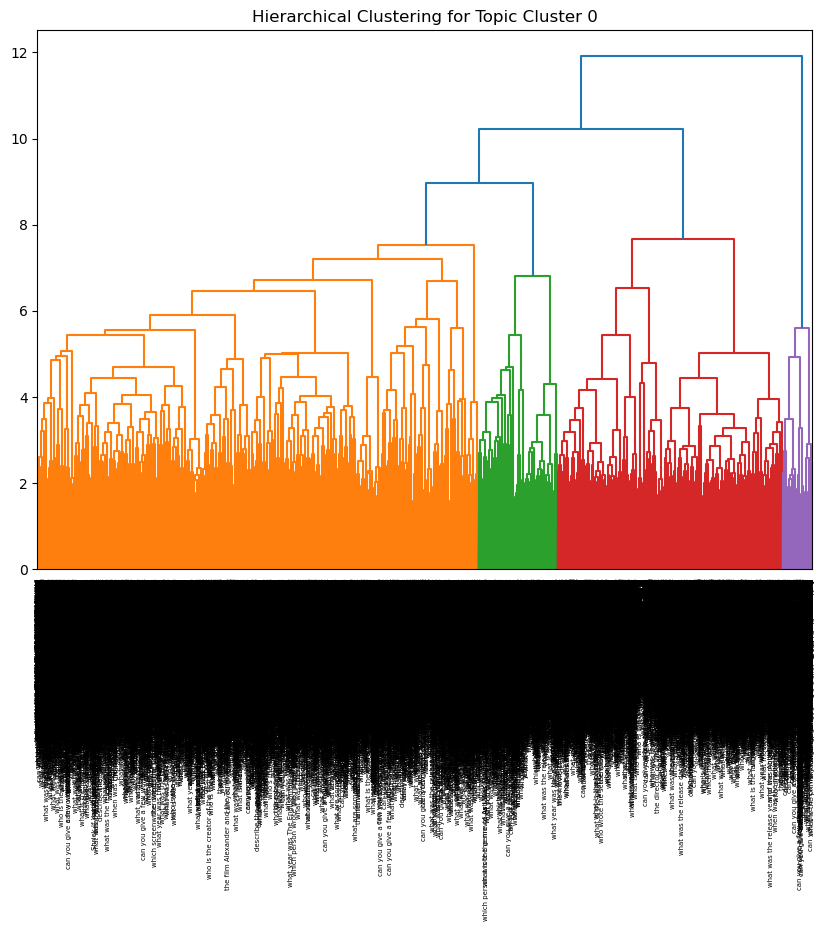

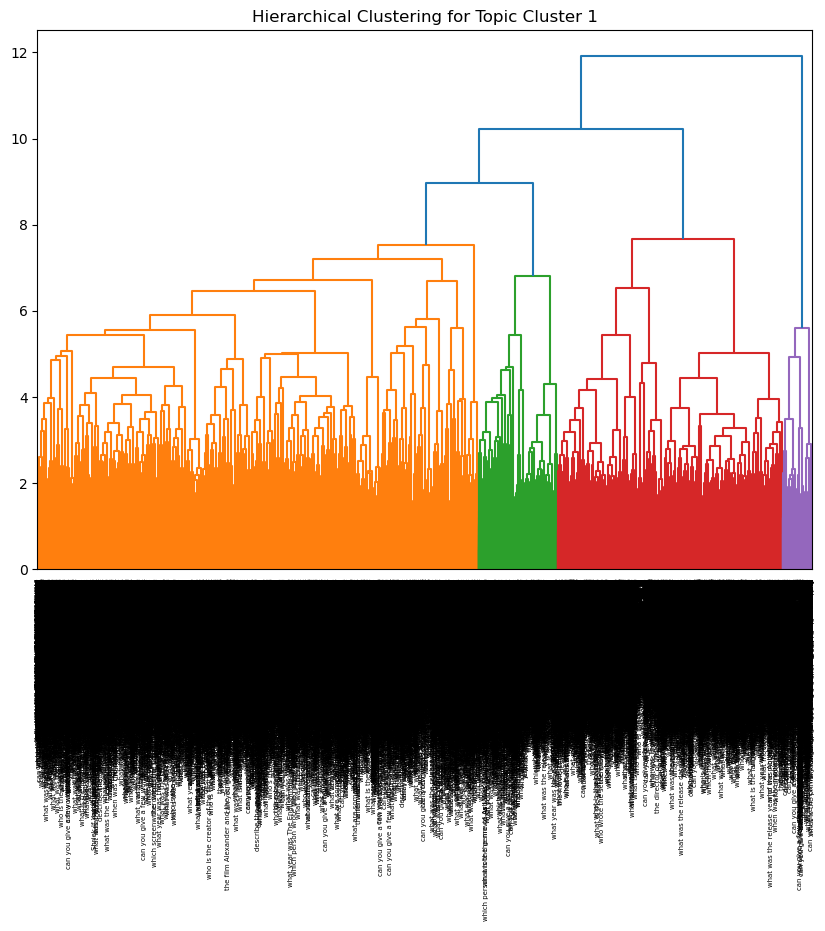

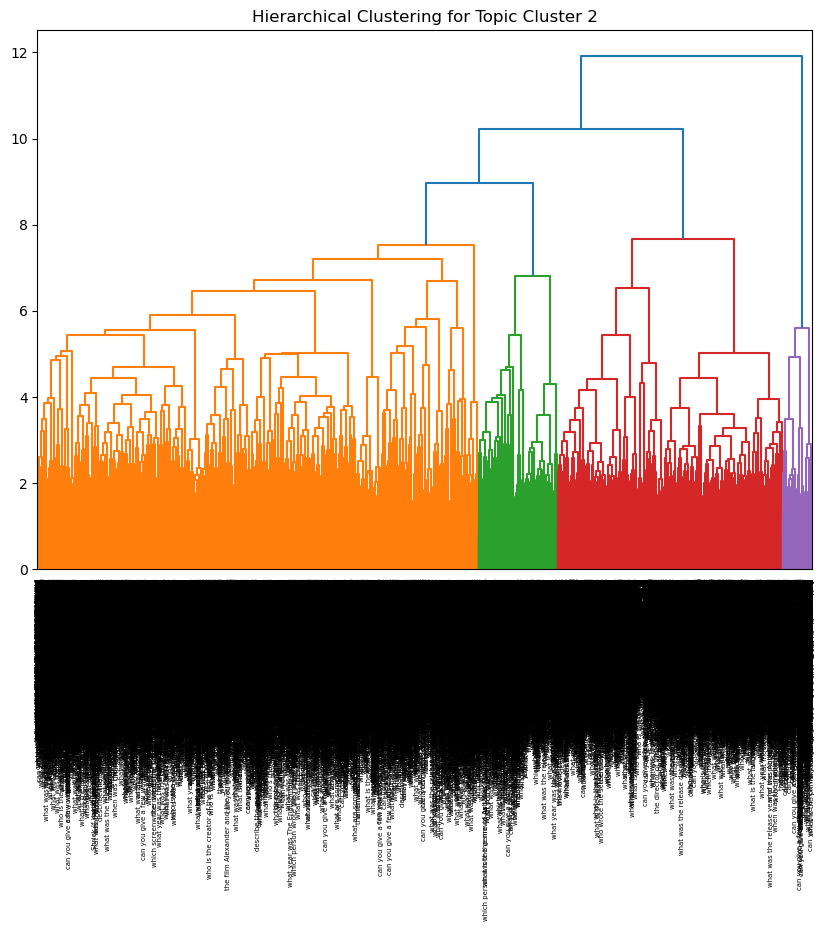

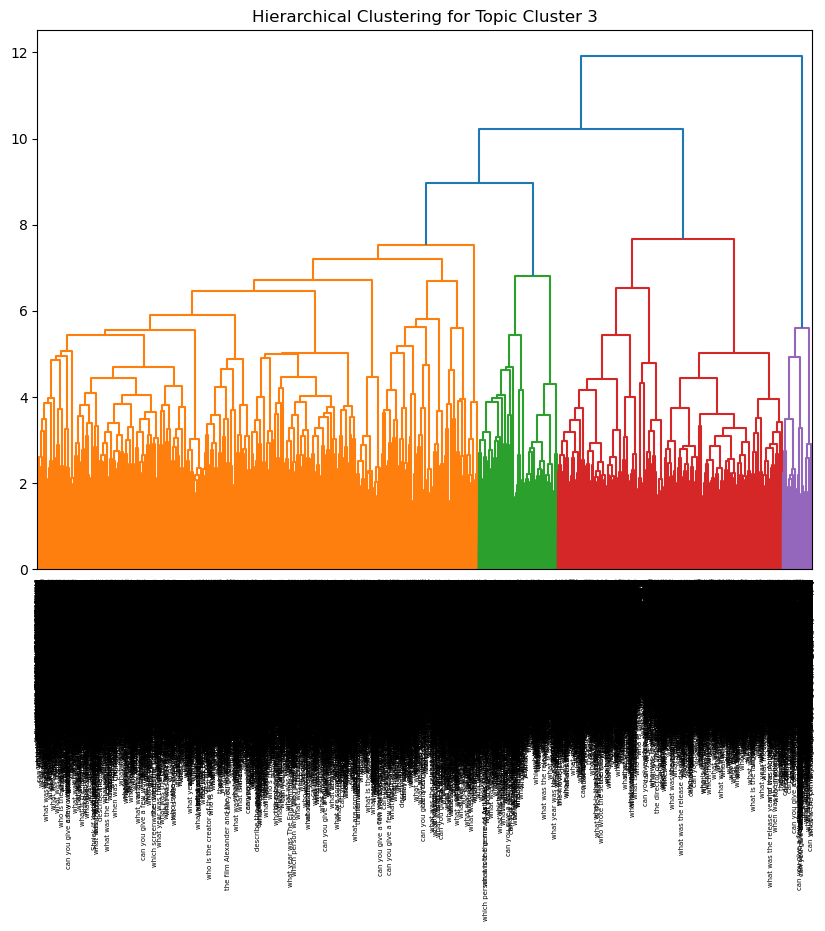

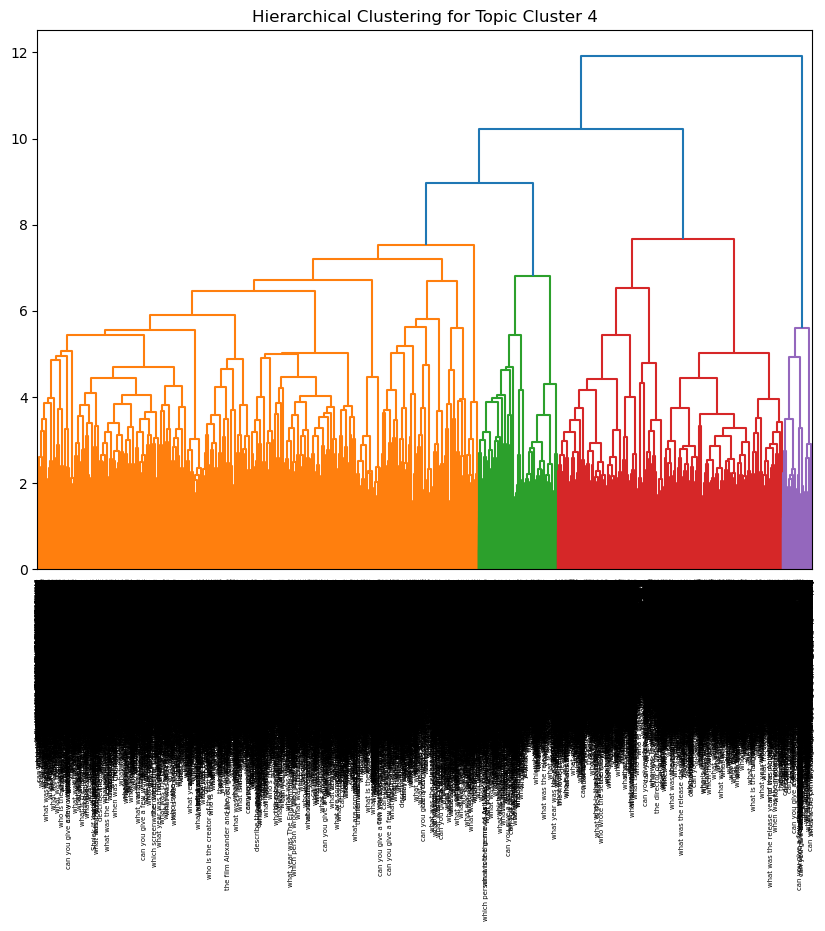

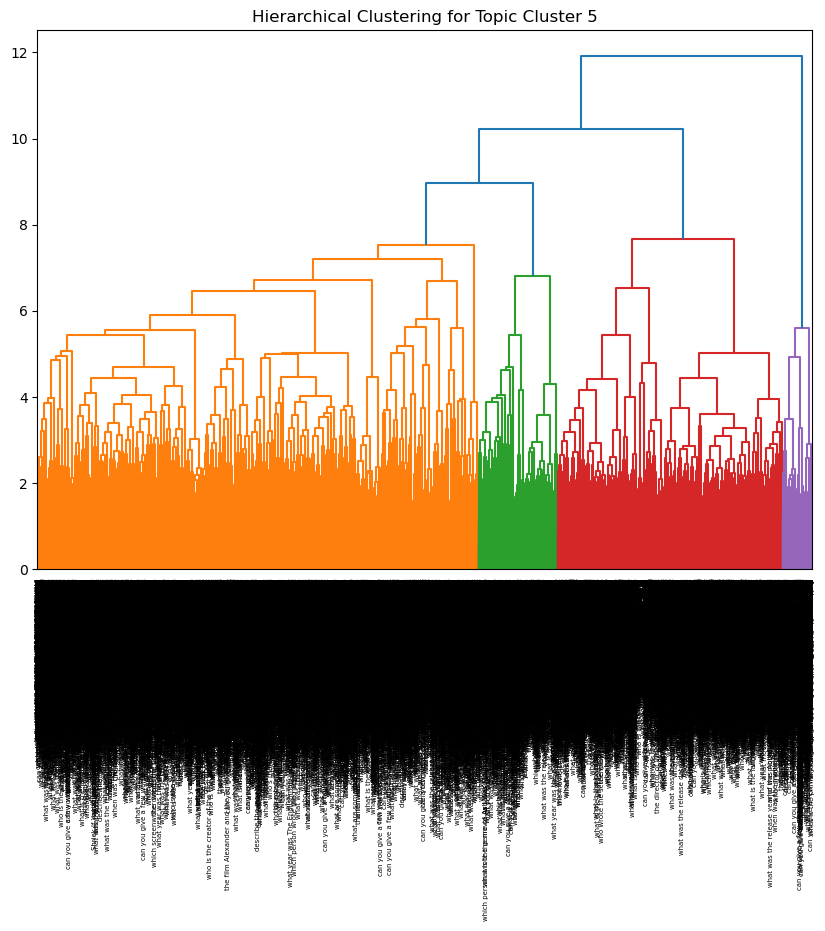

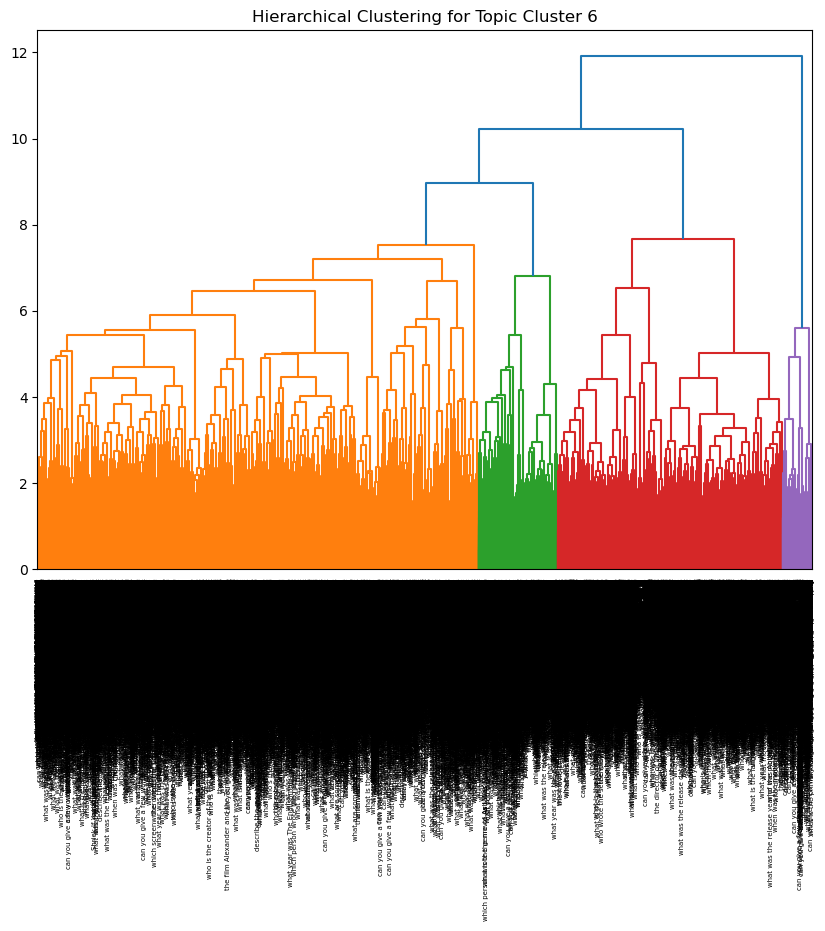

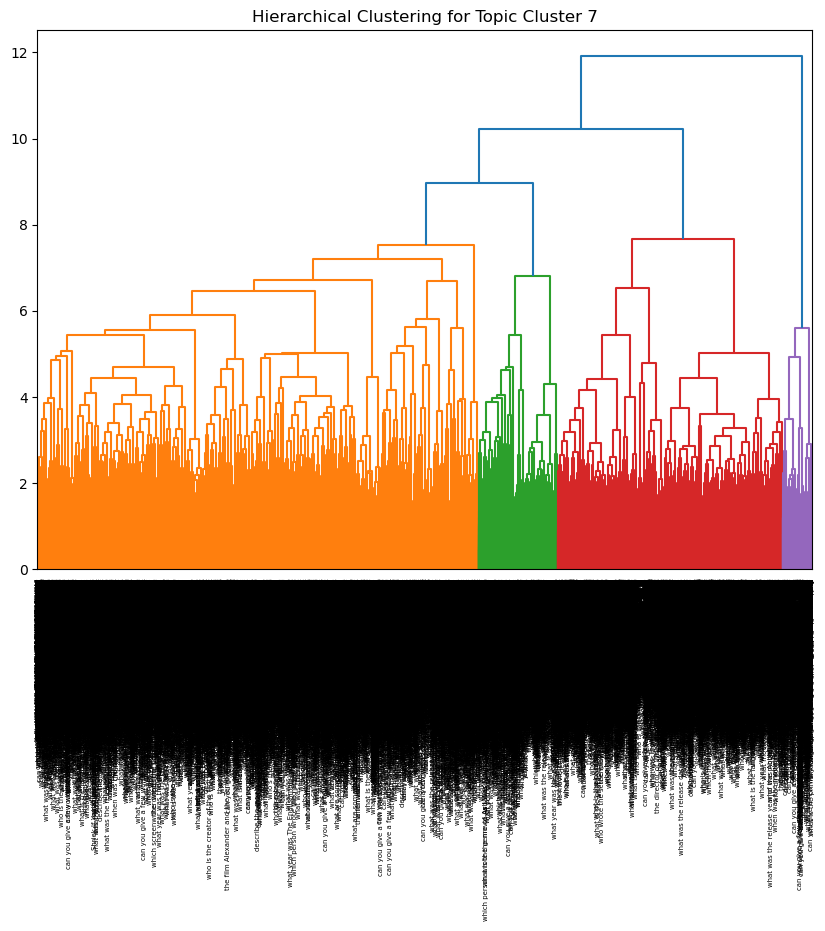

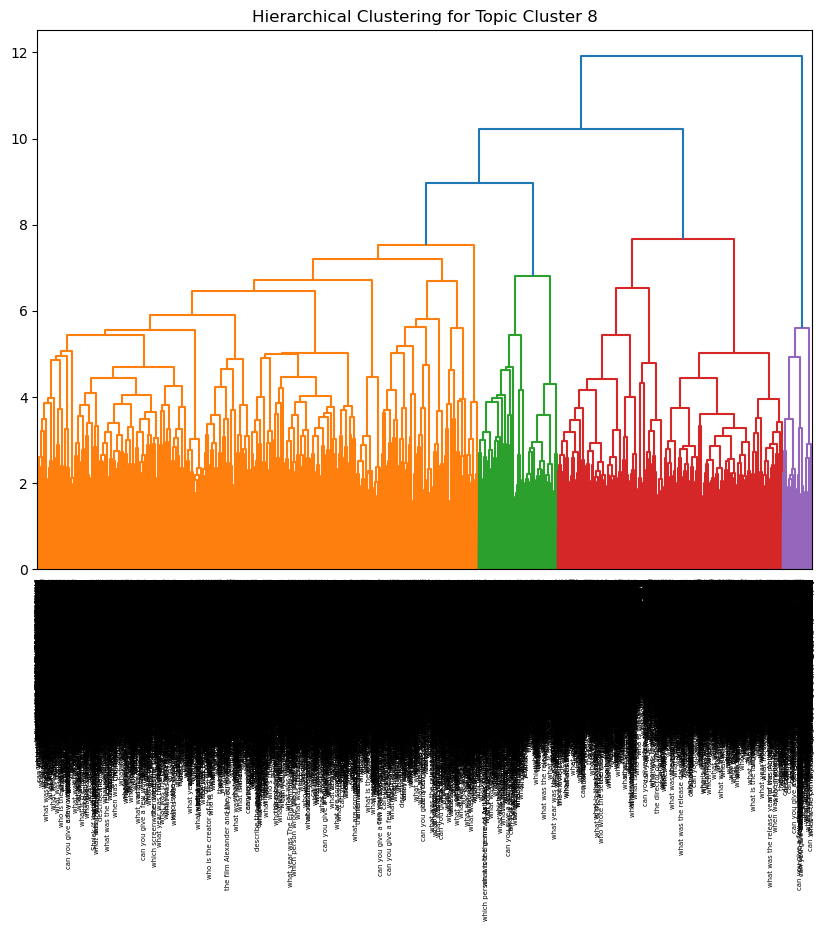

In [9]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Function to perform clustering and plot dendrogram
def plot_dendrogram(df, title):
    # Embedding the questions
    embeddings = model.encode(df_results['Question'].tolist())
    
    # Hierarchical clustering
    linked = linkage(embeddings, method='ward')
    
    # Plotting dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', labels=df_results['Question'].tolist(), distance_sort='descending', show_leaf_counts=True)
    plt.title(title)
    plt.show()

# Applying hierarchical clustering for each topic cluster
for cluster in sorted(df_results['Topic Cluster'].unique()):
    cluster_df = df_results[df_results['Topic Cluster'] == cluster]
    if not cluster_df.empty:
        plot_dendrogram(cluster_df, f'Hierarchical Clustering for Topic Cluster {cluster}')


In [10]:
len(cluster_df)

6

In [11]:
cluster_df

Question  \
1572                    who acted in People Like Us   
3351          who directed the movie People Like Us   
5015       how popular of a movie was Almost Famous   
5854       what words describe film Harriet the Spy   
7027         who is the writer of Mrs. Pollifax-Spy   
7400  what year was the movie Kung Fu Dunk released   

                                     Question Embedding  \
1572  [[-0.014475795, -0.06231289, -0.021682765, -0....   
3351  [[-0.0824998, -0.067273505, -0.032518633, -0.0...   
5015  [[0.05070201, -0.047186986, -0.0479465, -0.008...   
5854  [[-0.11684186, -0.06276943, -0.037331894, -0.0...   
7027  [[-0.082065344, -0.08614087, -0.025544409, 0.0...   
7400  [[-0.039041582, 0.0039062232, -0.059936017, -0...   

                       Most Similar Triple  Cosine Similarity Score  \
1572   Spies Like Us has_imdb_votes famous                 0.442125   
3351   Spies Like Us has_imdb_votes famous                 0.381785   
5015  Kung Fu Hustle has_imdb_votes famous                 0.461534   
5854   Spies Like Us has_imdb_votes famous                 0.401574   
7027   Spies Like Us has_imdb_votes famous                 0.405990   
7400  Kung Fu Hustle has_imdb_votes famous                 0.517790   

     Most Similar Relation  Topic Cluster  High Similarity  
1572        has_imdb_votes              8                0  
3351        has_imdb_votes              8                0  
5015        has_imdb_votes              8                0  
5854        has_imdb_votes              8                0  
7027        has_imdb_votes              8                0  
7400        has_imdb_votes              8                0